In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 5s 0us/step


In [ ]:
print(data_dir)

/content/drive/MyDrive/wheat_leaf2


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
#drive.mount('/content/drive')

# Define the path to your dataset
data_dir = '/content/drive/MyDrive/wheat_leaf2'

# Check the contents of the directory
os.listdir(data_dir)


['Healthy', 'random', 'septoria', 'stripe_rust']

In [ ]:
from PIL import Image
import os

# Assuming 'healthy' is one of the folders in your dataset directory
healthy_folder = os.path.join(data_dir, 'Healthy')

# List all the images in the 'healthy' folder
healthy_images = os.listdir(healthy_folder)

# Assuming you want to load the first image in the 'healthy' folder
image_path = os.path.join(healthy_folder, healthy_images[0])

# Load the image using PIL
image = Image.open(image_path)

# Display the image
image.show()


In [ ]:
img_height,img_width=224,224
batch_size=15
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9260 files belonging to 4 classes.
Using 7408 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9260 files belonging to 4 classes.
Using 1852 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Healthy', 'random', 'septoria', 'stripe_rust']


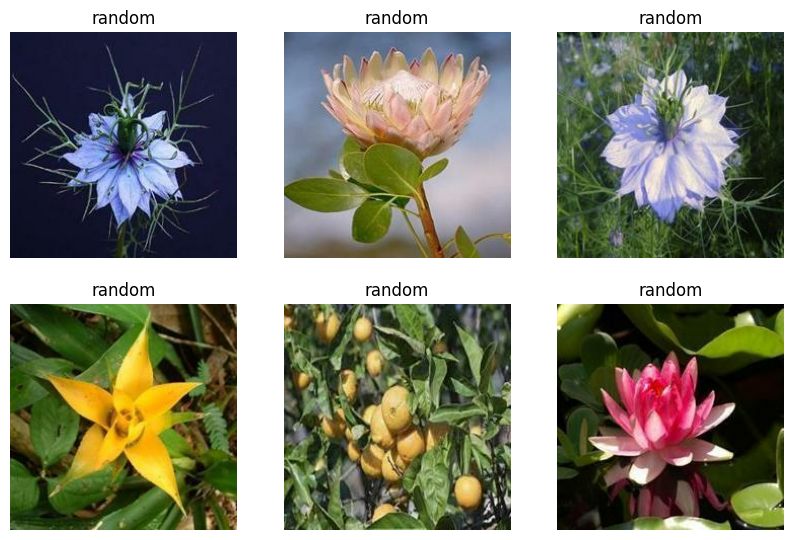

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense

# Load pre-trained ResNet-50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a new top layer to the model
x = base_model.output
x = Dense(4, activation='softmax')(x)

# Create a new model with the modified architecture
model = Model(inputs=base_model.input, outputs=x)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_18[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
epochs = 15
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/15
197/494 [==========>...................] - ETA: 18s - loss: 0.0000e+00 - accuracy: 0.9628

KeyboardInterrupt: 

# Evaluating The Model

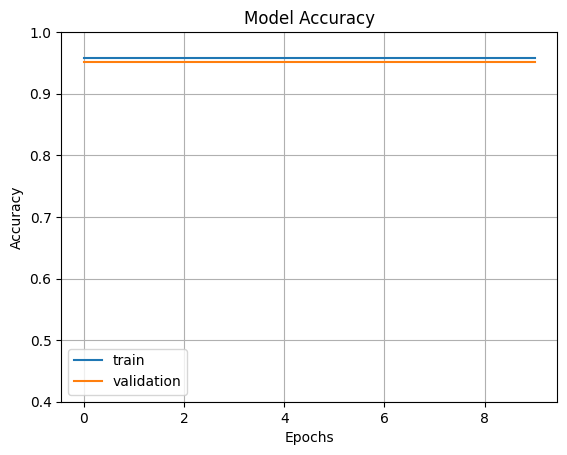

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

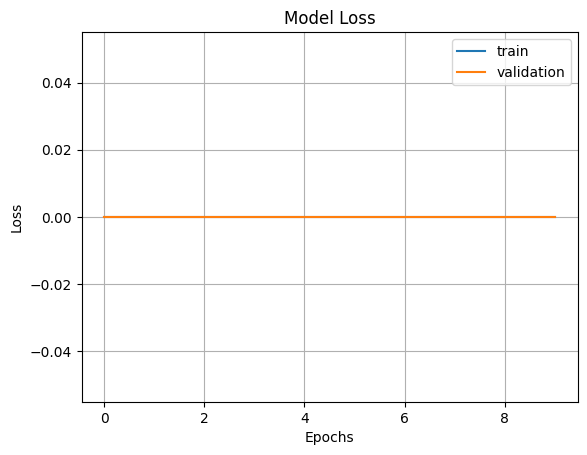

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [ ]:
import cv2
import os

# Define the path to your dataset directory
data_dir = '/content/drive/MyDrive/wheat_leaf2'

# Choose a class folder from your dataset (e.g., 'Healthy', 'random', 'septoria', 'stripe_rust')
class_folder = 'Healthy'

# List all the images in the chosen class folder
class_folder_path = os.path.join(data_dir, class_folder)
images = os.listdir(class_folder_path)

# Choose the first image from the list
image_path = os.path.join(class_folder_path, images[0])

# Load the image using OpenCV
image = cv2.imread(image_path)

# Define desired dimensions for resizing
img_height = 224
img_width = 224

# Resize the image
image_resized = cv2.resize(image, (img_width, img_height))

# Expand dimensions to make it compatible with model input
image_expanded = np.expand_dims(image_resized, axis=0)

print(image_expanded.shape)


(1, 224, 224, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
